NOTICE: Run using conda environment with ezc3d installed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ezc3d import c3d
import pandas as pd

In [2]:
# Rodar com os caminhos para os arquivos c3d
vj01c3dPath = './Vertical_jump0101.c3d'
#vj02c3dPath = './Vertical_jump0102.c3d'
#vj03c3dPath = './Vertical_jump0103.c3d'

In [3]:
# Função de leitura do c3d
def loadc3d(datc3d):
    datac3d = c3d(datc3d)
    #point_data = datac3d['data']['points']
    analog_data = datac3d['data']['analogs']
    # Reshaping the analog data
    #reshaped_point_data = point_data.reshape(48,point_data.shape[2])
    reshaped_analog_data = analog_data.reshape(12,analog_data.shape[2])
    return reshaped_analog_data

In [4]:
# Salvando dados em variáveis
point1 = pd.read_csv('./Vertical_jump0101_PointDataChannels.csv')
analog1 = loadc3d(vj01c3dPath)
#point2 = pd.read_csv('./Vertical_jump0102_PointDataChannels.csv')
#analog2 = loadc3d(vj02c3dPath)
#point3 = pd.read_csv('./Vertical_jump0103_PointDataChannels.csv')
#analog3 = loadc3d(vj03c3dPath)

In [5]:
print('point1\'s shape: ',point1.shape)
print('analog1\'s shape: ',analog1.shape)
#print('point2\'s shape: ',point2.shape)
#print('analog2\'s shape: ',analog2.shape)
#print('point3\'s shape: ',point3.shape)
#print('analog3\'s shape: ',analog3.shape)

point1's shape:  (436, 48)
analog1's shape:  (12, 4360)


In [6]:
point1['head                          _Z']

0      1720.2909
1      1720.3014
2      1719.8557
3      1719.7596
4      1719.9413
         ...    
431    1715.3011
432    1715.4736
433    1715.3729
434    1715.4313
435    1715.3884
Name: head                          _Z, Length: 436, dtype: float64

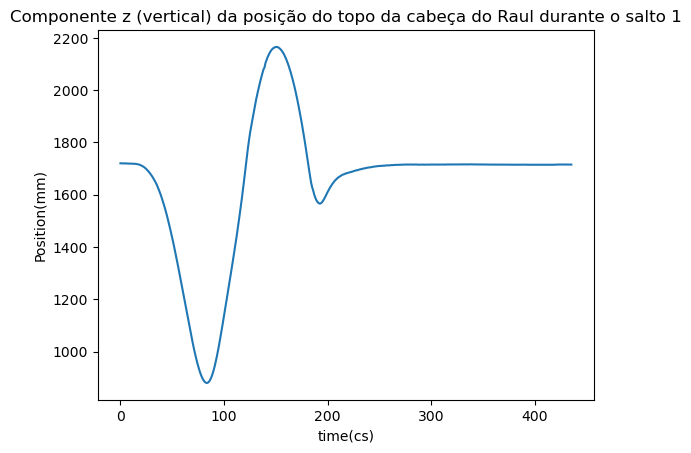

In [7]:
plt.plot(point1['head                          _Z'])
plt.title('Componente z (vertical) da posição do topo da cabeça do Raul durante o salto 1')
plt.xlabel('time(cs)')
plt.ylabel('Position(mm)')
plt.show();

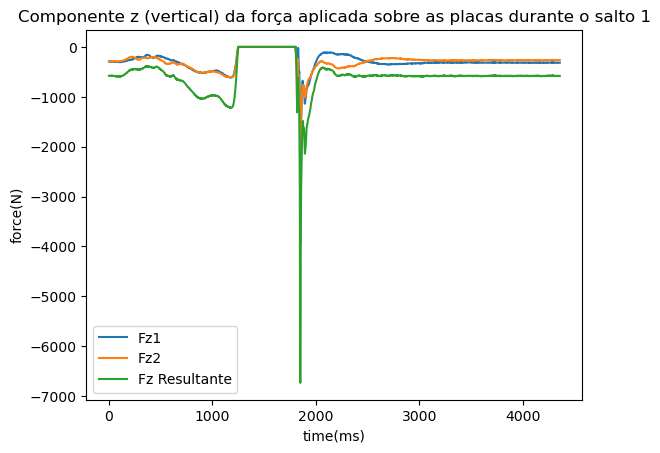

In [31]:
plt.plot(analog1[2])
plt.plot(analog1[8])
plt.plot(analog1[2]+analog1[8])
plt.title('Componente z (vertical) da força aplicada sobre as placas durante o salto 1')
plt.xlabel('time(ms)')
plt.ylabel('force(N)')
plt.legend(['Fz1','Fz2','Fz Resultante'])
plt.show();

In [9]:
# Supondo que você tenha os dados armazenados em 'point1'
x = np.arange(len(point1['head                          _Z']))

# Substitua 'head_Z' pelo nome real da coluna que representa o eixo y no seu DataFrame ou dicionário
y = point1['head                          _Z']

# Encontrar o índice do valor mínimo em y
indice_minimo = np.argmin(y)

# Encontrar o valor de x correspondente ao valor mínimo em y
x_valor_minimo = x[indice_minimo]

# Encontrar o índice do valor máximo em y
indice_maximo = np.argmax(y)

# Encontrar o valo de x correspondente ao valor máximo de y
x_valor_maximo = x[indice_maximo]

In [10]:
# Momento (em cs) em que a cabeça está no ponto mais baixo, e a posição (em mm)
print(x_valor_minimo,'cs : ',y[x_valor_minimo],'mm')

83 cs :  879.941 mm


In [11]:
# Momento (em cs) em que a cabeça está no ponto mais alto, e a posição (em mm)
print(x_valor_maximo,'cs : ',y[x_valor_maximo],'mm')

151 cs :  2165.6338 mm


In [33]:
# Coletando forças durante contramovimento
f_during_countermovement = analog1[2][830:1510] + analog1[8][830:1510]
f_during_countermovement

array([ -958.42834473,  -961.48010254,  -959.64904785,  -964.53186035,
        -965.75256348,  -965.75256348,  -967.58361816,  -971.24572754,
        -975.51818848,  -977.34924316,  -976.7388916 ,  -976.7388916 ,
        -982.23205566,  -982.23205566,  -987.72521973,  -984.06311035,
        -984.06311035,  -989.55627441,  -992.60803223,  -991.99768066,
        -990.77697754,  -993.82873535,  -999.32189941,  -998.10119629,
       -1001.76330566, -1005.42541504, -1004.20471191, -1010.9185791 ,
       -1009.08752441, -1012.13928223, -1014.58068848, -1015.19104004,
       -1015.19104004, -1019.46350098, -1018.24279785, -1018.85314941,
       -1018.24279785, -1018.85314941, -1018.85314941, -1020.6842041 ,
       -1018.85314941, -1020.07385254, -1020.6842041 , -1021.29455566,
       -1023.73596191, -1023.73596191, -1028.61877441, -1025.5670166 ,
       -1030.4498291 , -1026.78771973, -1029.83947754, -1028.00842285,
       -1029.83947754, -1033.50158691, -1034.11193848, -1032.28088379,
      

In [34]:
# Cálculo da força média durante o contramovimento
cmFmean = -np.mean(f_during_countermovement) # "menos" para obter o valor positivo
cmFmean

625.1656349630916

In [96]:
# Obtendo o impulso desde o início do contramovimento até a altura máxima alcançada
avgImpulseDuringCM = cmFmean * (151-83)*0.01
print("IMPULSE FROM START OF COUNTERMOVEMENT UNTIL MAX HEIGTH AQUIRED DURING JUMP:",avgImpulseDuringCM,'Ns')

IMPULSE FROM START OF COUNTERMOVEMENT UNTIL MAX HEIGTH AQUIRED DURING JUMP: 425.11263177490235 Ns


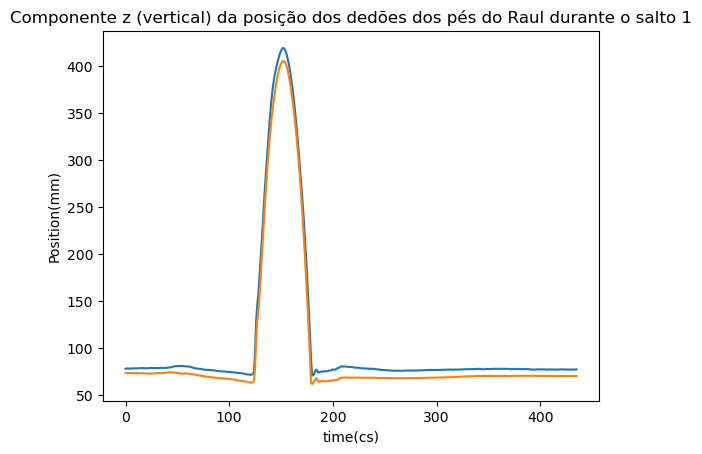

In [38]:
# Posição dos dedões dos pés ao longo do tempo
plt.plot(point1['lToe                          _Z'])
plt.plot(point1['rToe                          _Z'])
plt.title('Componente z (vertical) da posição dos dedões dos pés do Raul durante o salto 1')
plt.xlabel('time(cs)')
plt.ylabel('Position(mm)')
plt.show();

In [40]:
# Momento em que os dedões perdem o contato com as plataformas de força: 1251ms
generatedForce = analog1[2][830:1251] + analog1[8][830:1251]
generatedForce

array([ -958.42834473,  -961.48010254,  -959.64904785,  -964.53186035,
        -965.75256348,  -965.75256348,  -967.58361816,  -971.24572754,
        -975.51818848,  -977.34924316,  -976.7388916 ,  -976.7388916 ,
        -982.23205566,  -982.23205566,  -987.72521973,  -984.06311035,
        -984.06311035,  -989.55627441,  -992.60803223,  -991.99768066,
        -990.77697754,  -993.82873535,  -999.32189941,  -998.10119629,
       -1001.76330566, -1005.42541504, -1004.20471191, -1010.9185791 ,
       -1009.08752441, -1012.13928223, -1014.58068848, -1015.19104004,
       -1015.19104004, -1019.46350098, -1018.24279785, -1018.85314941,
       -1018.24279785, -1018.85314941, -1018.85314941, -1020.6842041 ,
       -1018.85314941, -1020.07385254, -1020.6842041 , -1021.29455566,
       -1023.73596191, -1023.73596191, -1028.61877441, -1025.5670166 ,
       -1030.4498291 , -1026.78771973, -1029.83947754, -1028.00842285,
       -1029.83947754, -1033.50158691, -1034.11193848, -1032.28088379,
      

In [60]:
len(generatedForce)

421

In [46]:
# Força média gerada no contramovimento, do ponto mínimo (altura da cabeça) até o fim do contato com o chão
avgGeneratedForce = -np.mean(generatedForce)
avgGeneratedForce

1009.7687215555875

In [95]:
# IMPULSO GERADO, em Ns
generatedImpulse = avgGeneratedForce*(125.1-83)*0.01
print("IMPULSE GENERATED PRIOR TO LOSS OF CONTACT TO GROUND:",generatedImpulse,'Ns')

IMPULSE GENERATED PRIOR TO LOSS OF CONTACT TO GROUND: 425.11263177490224 Ns


###Nota-se que tanto faz calcular o impulso das seguintes formas, sendo o resultado praticamente o mesmo:

1. A força resultante média aplicada sobre as plataformas desde o ponto de mínimo até o ponto de máximo, vezes este intervalo de tempo

2. A força resultante média aplicada sobre as plataformas desde o ponto de mínimo até o momento de perda de contato com o solo

Isso significa que no intervalo de tempo após a perda de contato até o atingimento da altura máxima, nenhuma outra força pró salto atuou sobre o corpo do Raul de forma a influenciar no impulso gerado. Ou seja, apenas seu próprio esforço foi responsável pela execução da atividade.

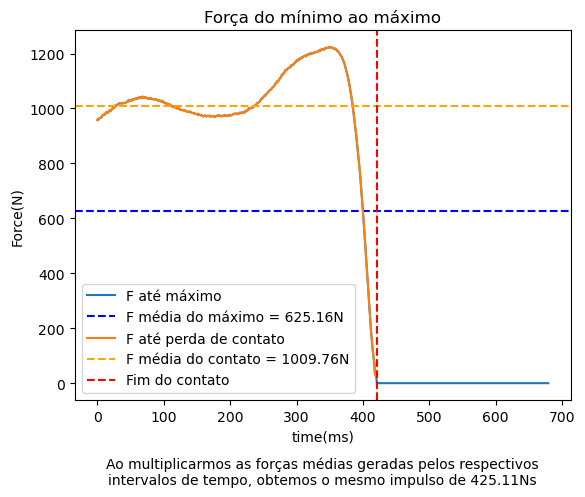

In [98]:
# Demonstração gráfica
plt.plot(-f_during_countermovement, label='F até máximo')
plt.axhline(y=cmFmean, color='blue', linestyle='--', label='F média do máximo = 625.16N')
plt.plot(-generatedForce, label='F até perda de contato')
plt.axhline(y=avgGeneratedForce, color='orange', linestyle='--', label='F média do contato = 1009.76N')
plt.axvline(x=421, color='r', linestyle='--', label='Fim do contato')
plt.title('Força do mínimo ao máximo')
plt.xlabel('time(ms)')
plt.ylabel('Force(N)')
plt.legend()
plt.text(0.5, -0.15, '\n\nAo multiplicarmos as forças médias geradas pelos respectivos\nintervalos de tempo, obtemos o mesmo impulso de 425.11Ns', ha='center', va='center', transform=plt.gca().transAxes)
plt.show();